In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist=keras.datasets.fashion_mnist

In [5]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [6]:
class_name=['T-shirt/top','Trouser','Pullover','Dress','Coat',
           'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

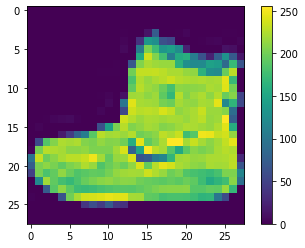

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images=train_images/255.0
test_images=test_images/255.0

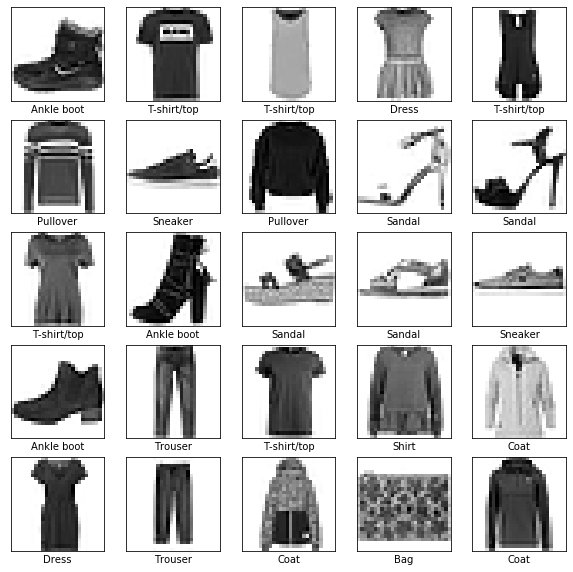

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[ train_labels[i]])    
plt.show()
    

In [25]:
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

W0813 03:14:06.652886  3820 deprecation.py:506] From D:\Anaconda\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.4921 - acc: 0.8265
Epoch 2/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.3712 - acc: 0.8663
Epoch 3/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3353 - acc: 0.8776
Epoch 4/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.3101 - acc: 0.8856
Epoch 5/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2940 - acc: 0.8915
Epoch 6/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2805 - acc: 0.8969
Epoch 7/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2681 - acc: 0.9006
Epoch 8/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.2572 - acc: 0.9043
Epoch 9/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2466 - acc: 0.9080
Epoch 10/10
60000/60000 [==============================] - 8s 128us/sampl

In [29]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Test accuracy:',test_acc)

10000/10000 [==============================] - 1s 101us/sample - loss: 0.3354 - acc: 0.8851
Test accuracy: 0.8851


In [32]:
predictions=model.predict(test_images)

In [33]:
predictions[0]

array([7.80839798e-07, 1.00039355e-08, 5.67962477e-09, 7.25528734e-11,
       1.32322739e-08, 2.76249455e-04, 9.71031042e-08, 2.19541490e-02,
       7.75926310e-07, 9.77767885e-01], dtype=float32)

In [34]:
np.argmax(predictions[0])

9

In [35]:
test_labels[0]

9

In [36]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                         100*np.max(predictions_array),
                                         class_name[true_label]),
                                         color=color)
    
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[predicted_label].set_color('green')
    
    
                  

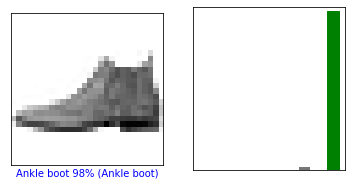

In [39]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

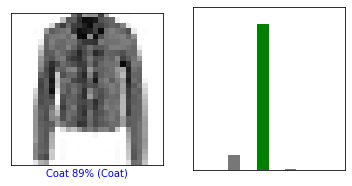

In [41]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

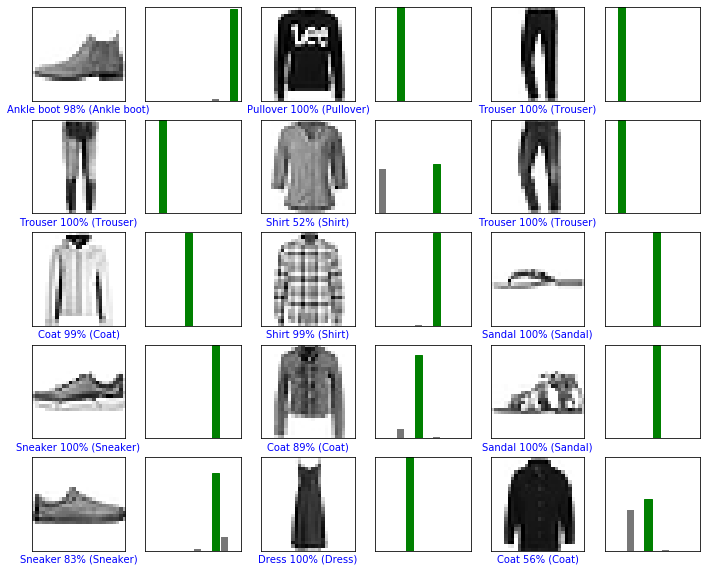

In [44]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)
plt.show()
    
    

In [45]:
img=test_images[0]
print(img.shape)

(28, 28)


In [49]:
img=(np.expand_dims(img,0))
print(img.shape)
     

(1, 28, 28)


In [50]:
predictions_single=model.predict(img)
print(predictions_single)

[[7.80841219e-07 1.00039355e-08 5.67963543e-09 7.25530122e-11
  1.32322988e-08 2.76250212e-04 9.71032890e-08 2.19541918e-02
  7.75927788e-07 9.77767885e-01]]


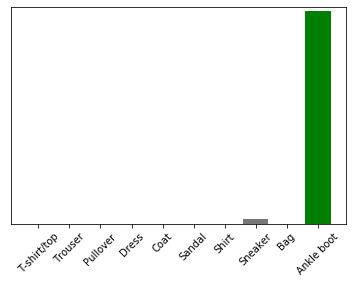

In [52]:
plot_value_array(0,predictions_single,test_labels)
_=plt.xticks(range(10),class_name,rotation=45)

In [53]:
np.argmax(predictions_single[0])

9